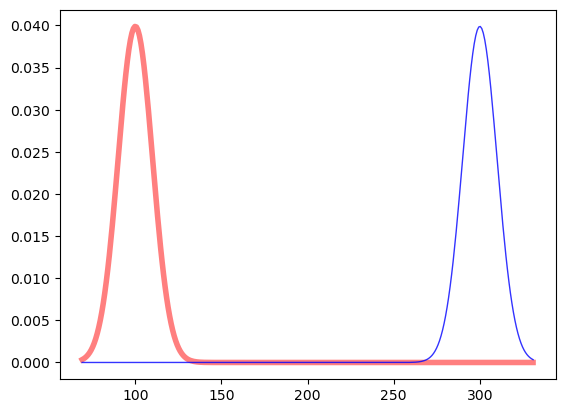

In [50]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt

# plt.subplots takes the number of desired rows and columns,
# and spits out a Figure object as well as either the single axes obj,
# or an array of axes objects which must be indexed into.
fig, ax = plt.subplots(1, 1)

# define RVs using mean & std deviation
X = sp.norm(loc = 100, scale = 10)
Y = sp.norm(loc = 300, scale = 10)
# store their key statistics
meanX, varX = X.stats(moments = 'mv')
meanY, varY = Y.stats(moments = 'mv')

# generate a linear space of discrete points (start, stop, num)
# ppf is percent point function (inverse of the cdf; percentile)
lin = np.linspace(X.ppf(0.001), Y.ppf(0.999), num = 300)

# displays a graph
# takes x, f(x), type of line, width, transparency, & label
ax.plot(lin, X.pdf(lin), 'r-', lw=4, alpha = 0.5)
ax.plot(lin, Y.pdf(lin), 'b-', lw=1, alpha = 0.8)

[204.14496026 191.99818243 188.35436133 ... 199.93705385 199.41511989
 196.45917169]
[108.49369095  95.05400555 110.98847782 ... 307.32119844 306.61350474
 294.6865407 ]


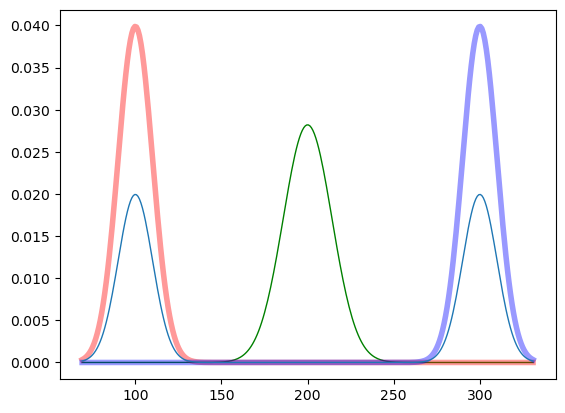

In [101]:
# new plot
fig2, ax2 = plt.subplots(1, 1)

# define RV U = (X + Y) / 2 according to laws of summation of normals
U = sp.norm(loc = (meanX + meanY)/2, scale = np.sqrt(varX + varY))

# plot all PDFs!
ax2.plot(lin, U.pdf(lin), 'g-', lw=1)
ax2.plot(lin, X.pdf(lin), 'r-', lw=4, alpha = 0.4)
ax2.plot(lin, Y.pdf(lin), 'b-', lw=4, alpha = 0.4)
# the PDF for Z can be constructed as (X.pdf(lin) + Y.pdf(lin)) / 2
ax2.plot(lin, (X.pdf(lin) + Y.pdf(lin)) / 2, lw=1)

Text(0.5, 1.0, 'Random Variable U (Bins: 100)')

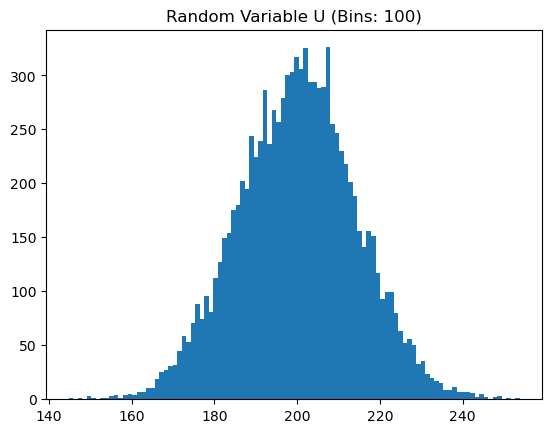

In [114]:
# sample and plot a histogram of U

samplesU = U.rvs(10000)

plt.hist(samplesU, 100)

plt.title("Random Variable U (Bins: 100)")

Text(0.5, 1.0, 'Random Variable Z (Bins: 100)')

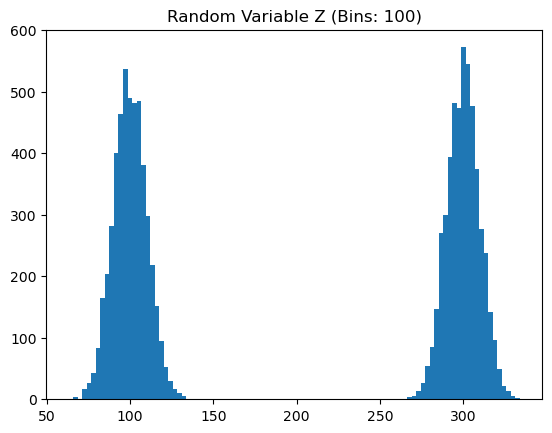

In [115]:
# sample and plot a histogram of Z

# to simulate RV Z, sample from either X wp. 1/2 or Y otherwise.
# use binomial to determine number of X samples:
total_samples = 10000
num_x_samples = sp.binom.rvs(total_samples, 0.5, 1)
num_y_samples = total_samples - num_x_samples
samplesZ = np.concatenate((X.rvs(num_x_samples), Y.rvs(num_y_samples)))

plt.hist(samplesZ, 100)
plt.title("Random Variable Z (Bins: 100)")